<a href="https://colab.research.google.com/github/AiNguyen237/ISLR_lab_using_Python/blob/main/Classification/Classification_Lab_Session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. The Stock Market Data 



In [ ]:
#@title Import libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import (confusion_matrix,accuracy_score)
import sklearn.discriminant_analysis
import sklearn.neighbors

In [ ]:
# Load the data
Smarket = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Smarket.csv', index_col=0)

Data: 
``Lag1`` to ``Lag5``: each of five previous trading days 

``Volume``: number of shares traded on the previous day, in billions 

``Today``: percentage return on the date in question 

``Direction``: whether the market was ``Up`` or ``Down`` on this date 

Goal: Predict ``Direction``


In [ ]:
# Look at the data info
Smarket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 97.7+ KB


In [ ]:
# Data description
Smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [ ]:
# Check to see how many are Ups and how many are Downs in Direction
Smarket.Direction.value_counts()

Up      648
Down    602
Name: Direction, dtype: int64

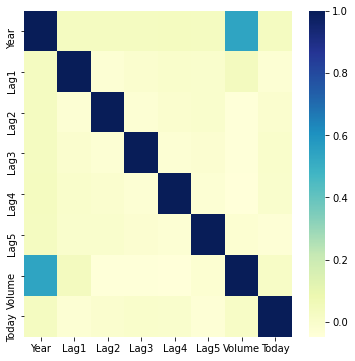

In [ ]:
# Produce a matrix that contains all the pairwise correlations among the predictors in a dataset. 
# Remember to exclude the column Direction 
x_market = Smarket.drop('Direction', axis = 1)
Smarket_corr = x_market.corr()
plt.figure(figsize = (6,6))
sns.heatmap(data=Smarket_corr, cmap="YlGnBu")
plt.show()

In [ ]:
Smarket_corr

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


- The correlations between the lag variables and today's returns are close to zero OR there are little to no correlation between today's returns and the previous days' returns.
- The only substantial correlation is between ``Year`` and ``Volume``

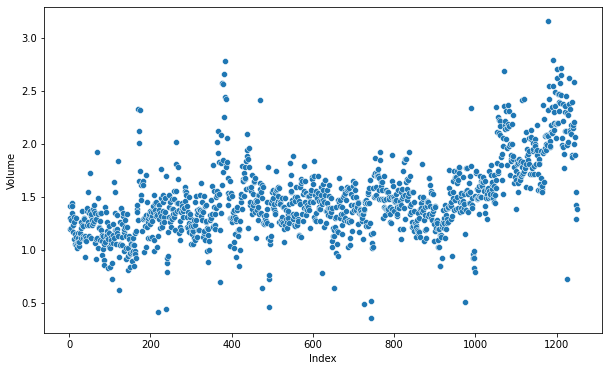

In [ ]:
# Let's plot to see the correlation between Year and Volume 
plt.figure(figsize=(10,6))
sns.scatterplot(y = 'Volume', x = Smarket.index, data = Smarket)
plt.xlabel('Index')
plt.show()

Because the data is ordered chronologically, we can see that ``Volume`` is increasing over time

# 2. Logistic Regressions 

Let's try fitting a Logistic Regression model in order to predict ``Direction`` using ``Lag1`` to ``Lag5`` and ``Volume``. 

In [ ]:
X = sm.add_constant(Smarket.drop(['Year','Direction','Today'], axis = 1))
y = Smarket['Direction']

In [ ]:
# Since y is 'Up' and 'Down' OR object type -> need to change this to a 0-1 label 
y = y.apply(lambda x: 0 if x == 'Down' else 1)

In [ ]:
# Fitting the data to Logistic Regression model
lr = sm.GLM(y, X, family = sm.families.Binomial()).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1243
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -863.79
Date:                Tue, 14 Sep 2021   Deviance:                       1727.6
Time:                        13:10:20   Pearson chi2:                 1.25e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

The smallest p-value associated with ``Lag1``. 

**How to intepret the result**
The negative coefficient of ``Lag1`` means that if the market had a positive return yesterday then it is less likely to go Up to day.

But the p-value of 0.15 is quite high -> Fail to reject the null hypothesis that there is no clear evidence of a real association between ``Lag1`` and ``Direction.``

Predict the first 10 probabilities. 

In [ ]:
xtest = sm.add_constant(Smarket.drop(['Year','Direction','Today'], axis = 1).head(10))
pred = lr.predict(xtest)
pred

1     0.507084
2     0.481468
3     0.481139
4     0.515222
5     0.510781
6     0.506956
7     0.492651
8     0.509229
9     0.517614
10    0.488838
dtype: float64

The values correspond to the probability of the market going ``Up`` or ``Down``. 

In order to make a prediction as to whether the market will go ``Up`` or ``Down``, let's convert these into class labels.

In [ ]:
pred = lr.predict(sm.add_constant(Smarket.drop(['Year','Direction','Today'], axis = 1)))
pred = pred.apply(lambda x: 'Up' if x > 0.5 else 'Down')

Calculate a confusion matrix. 

|TN|FP|
|--|--|
|FN|TP|

In [ ]:
confusion_matrix(Smarket['Direction'], pred)

array([[145, 457],
       [141, 507]])

The diagonal elements of the confusion matrix indicate correct predictions, while the off-diagonal represent incorrect predictions. 

Our model correctly predicted 652 rows, which is 52.2% of the time. This means that the training error is 47.8%. 

Test out new data on our model to see how well it does on unseen data.

Train a new model using only training data from 2001-2004 and held out data observations from 2005.

In [ ]:
xtrain = Smarket[Smarket['Year'] < 2005]
xtrain = xtrain.drop(['Year','Direction','Today'], axis = 1)
xtrain = sm.add_constant(xtrain)

In [ ]:
ytrain = Smarket[Smarket['Year'] < 2005]['Direction']
ytrain = ytrain.apply(lambda x: 0 if x == 'Down' else 1)
ytrain

1      1
2      1
3      0
4      1
5      1
      ..
994    0
995    1
996    0
997    1
998    0
Name: Direction, Length: 998, dtype: int64

In [ ]:
lr2 = sm.GLM(ytrain, xtrain, family=sm.families.Binomial()).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                  998
Model:                            GLM   Df Residuals:                      991
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -690.55
Date:                Tue, 14 Sep 2021   Deviance:                       1381.1
Time:                        13:20:39   Pearson chi2:                     998.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.052     -1.046      0.295      -0.156       0.047
Lag2          -0.0458      0.052     -0.884      0.377      -0.147       0.056
Lag3           0.0072      0.052      0.139      0.889      -0.094       0.108
Lag4           0.0064      0.052      0.125      0.901      -0.095       0.108
Lag5          -0.0042      0.051     -0.083      0.934      -0.104       0.096
Volume        -0.1163      0.240     -0.485      0.628      -0.586       0.353
==============================================================================
"""

In [ ]:
xtest = Smarket[Smarket['Year'] == 2005]
xtest = xtest.drop(['Year','Direction','Today'], axis = 1)
xtest = sm.add_constant(xtest)

In [ ]:
ytest = Smarket[Smarket['Year'] == 2005]['Direction']

In [ ]:
ypredtest = lr2.predict(xtest)
ypredtest = ypredtest.apply(lambda x: 'Up' if x > 0.5 else 'Down')

In [ ]:
confusion_matrix(ytest, ypredtest)

array([[77, 34],
       [97, 44]])

The test error rate is 52%, which is worse than random guessing. 

This is not unexpected, as we can see from the previous LR, all the p-values are quite high and the smallest is ``Lag1``. 

This means that we should remove the variables that appear to not be helpful in predicting ``Direction``. Remember using predictors that have no relationship with the response will tend to increase the variance without a corresponding decrease in bias. Which means the response will tends to deteriorate in the test error rate. 

Looking back at the original Logistic Regression model, ``Lag1`` and ``Lag2`` which seemed to have the highest predictive power. 

In [ ]:
xtrain1 = Smarket[Smarket['Year'] < 2005]
xtrain1 = xtrain1[['Lag1', 'Lag2']]
xtrain1 = sm.add_constant(xtrain1)

In [ ]:
lr3 = sm.GLM(ytrain, xtrain1, family=sm.families.Binomial()).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                  998
Model:                            GLM   Df Residuals:                      995
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -690.70
Date:                Tue, 14 Sep 2021   Deviance:                       1381.4
Time:                        13:45:01   Pearson chi2:                     998.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0322      0.063      0.508      0.611      -0.092       0.156
Lag1          -0.0556      0.052     -1.076      0.282      -0.157       0.046
Lag2          -0.0445      0.052     -0.861      0.389      -0.146       0.057
==============================================================================
"""

In [ ]:
xtest1 = Smarket[Smarket['Year'] == 2005]
xtest1 = xtest1[['Lag1', 'Lag2']]
xtest1 = sm.add_constant(xtest1)

In [ ]:
ypredtest1 = lr3.predict(xtest1)
ypredtest1 = ypredtest1.apply(lambda x: 'Up' if x > 0.5 else 'Down')

In [ ]:
confusion_matrix(ytest,ypredtest1)

array([[ 35,  76],
       [ 35, 106]])

The results appear to be a bit better: 56% of the daily movements have been correctly predicted.

# 3. Linear Discriminant Analysis 

In [ ]:
xtrain2 = Smarket[Smarket['Year'] < 2005]
xtrain2 = xtrain1[['Lag1', 'Lag2']]

In [ ]:
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(xtrain2,ytrain)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
# Print out the coefficient 
lda.coef_

array([[-0.05544078, -0.0443452 ]])

The LDA coefficient indicates that for the previous 2 days' returns to be negativve on days when the market increases and a tendency for the previous days' returns to be positive on days when market declines. 

The coefficients of linear discriminants output provides the linear combination of ``Lag1`` and ``Lag2`` that are used to form the LDA decision rule.

In [ ]:
xtest2 = Smarket[Smarket['Year'] == 2005]
xtest2 = xtest1[['Lag1', 'Lag2']]

In [ ]:
ypredtest2 = lda.predict(xtest2)

In [ ]:
ytest2 = ytest.apply(lambda x: 0 if x == 'Down' else 1)

In [ ]:
confusion_matrix(ytest2,ypredtest2)

array([[ 35,  76],
       [ 35, 106]])

The LDA and logistic regression predictions made on this test set is almost identical.

# 4. Quadratic Discriminant Analysis

In [ ]:
qda = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()
qda.fit(xtrain2,ytrain)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
ypredtest3 = qda.predict(xtest2)

In [ ]:
confusion_matrix(ytest2,ypredtest3)

array([[ 30,  81],
       [ 20, 121]])

The QDA predictions are accurate almost 60% of the time, even though the 2005 data was not used to fit the model. This suggest that the QDA model can capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression. 

# 5. Naive Bayes 

In [ ]:
nb = GaussianNB()
nb.fit(xtrain2,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
ypredtest4 = nb.predict(xtest2)

In [ ]:
confusion_matrix(ytest2,ypredtest4)

array([[ 29,  82],
       [ 20, 121]])

Naive Bayes performs well on this data, with accurate predictions over 59% of the time, but a little bit worse than QDA. 

# 5. K-Nearest Neighbors

In [ ]:
# First, test with n_neignbors = 1
knn1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
knn1.fit(xtrain2, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
ypredtest5 = knn1.predict(xtest2)

In [ ]:
confusion_matrix(ytest2,ypredtest5)

array([[43, 68],
       [58, 83]])

The result is not very good since only 50% of the observations are correctly predicted. It should be because that n_neighbors = 1 results in an overly flexible fit to the data.

In [ ]:
# Repeat the analysis with n_neighbors = 3
knn2 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
knn2.fit(xtrain2, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
ypredtest6 = knn2.predict(xtest2)

In [ ]:
confusion_matrix(ytest2,ypredtest6)

array([[48, 63],
       [55, 86]])

The result improves slightly. But increasing K doesn't prove to provide any further improvements. 